<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/Project2/blob/main/dataprocessing2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/환경프로젝트/한국전력거래소 원본데이터(시간별)/한국전력거래소_지역별 시간대별 전력거래량_2017.csv', encoding='cp949')
df.head()

,거래일자,거래시간,지역,전력거래량(MWh),Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,2017-01-01,1,경기도,5909,NaN,NaN,NaN,NaN
1,2017-01-01,2,경기도,5024,NaN,NaN,NaN,NaN
2,2017-01-01,3,경기도,4254,NaN,NaN,NaN,NaN
3,2017-01-01,4,경기도,4085,NaN,NaN,NaN,NaN
4,2017-01-01,5,경기도,4211,NaN,NaN,NaN,NaN


In [ ]:
df['지역'] = df['지역'].replace('서울시', '서울특별시')
df.head()

,거래일자,거래시간,지역,전력거래량(MWh),Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,2017-01-01,1,경기도,5909,NaN,NaN,NaN,NaN
1,2017-01-01,2,경기도,5024,NaN,NaN,NaN,NaN
2,2017-01-01,3,경기도,4254,NaN,NaN,NaN,NaN
3,2017-01-01,4,경기도,4085,NaN,NaN,NaN,NaN
4,2017-01-01,5,경기도,4211,NaN,NaN,NaN,NaN


In [ ]:
df[df['지역'] == '서울특별시']

,거래일자,거래시간,지역,전력거래량(MWh),Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
216,2017-01-01,1,서울특별시,213,NaN,NaN,NaN,NaN
217,2017-01-01,2,서울특별시,212,NaN,NaN,NaN,NaN
218,2017-01-01,3,서울특별시,212,NaN,NaN,NaN,NaN
219,2017-01-01,4,서울특별시,211,NaN,NaN,NaN,NaN
220,2017-01-01,5,서울특별시,212,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
148747,2017-12-31,20,서울특별시,90,NaN,NaN,NaN,NaN
148748,2017-12-31,21,서울특별시,89,NaN,NaN,NaN,NaN
148749,2017-12-31,22,서울특별시,90,NaN,NaN,NaN,NaN
148750,2017-12-31,23,서울특별시,89,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148920 entries, 0 to 148919
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   거래일자        148920 non-null  object 
 1   거래시간        148920 non-null  int64  
 2   지역          148920 non-null  object 
 3   전력거래량(MWh)  148920 non-null  object 
 4   Unnamed: 4  0 non-null       float64
 5   Unnamed: 5  0 non-null       float64
 6   Unnamed: 6  0 non-null       float64
 7   Unnamed: 7  0 non-null       float64
dtypes: float64(4), int64(1), object(3)
memory usage: 9.1+ MB


In [ ]:
df = df.drop(columns=['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'])

In [ ]:
df = df[df['지역'] == '경기도']
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 0 to 148535
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   거래일자        8760 non-null   object
 1   거래시간        8760 non-null   int64 
 2   지역          8760 non-null   object
 3   전력거래량(MWh)  8760 non-null   object
dtypes: int64(1), object(3)
memory usage: 342.2+ KB


In [ ]:
df.head()

,거래일자,거래시간,지역,전력거래량(MWh)
0,2017-01-01,1,경기도,5909
1,2017-01-01,2,경기도,5024
2,2017-01-01,3,경기도,4254
3,2017-01-01,4,경기도,4085
4,2017-01-01,5,경기도,4211


In [ ]:
df['거래시간'] = pd.to_numeric(df['거래시간'], errors='coerce').astype('Int64')
df['거래시간'] = df['거래시간'].apply(lambda x: f'{int(x) % 24:02d}:00' if pd.notna(x) else x) # Convert x to int and handle NaN
df['일시'] = pd.to_datetime(df['거래일자'] + ' ' + df['거래시간'], format='%Y-%m-%d %H:%M', errors='coerce') # Handle potential errors in datetime conversion
df.head()

,거래일자,거래시간,지역,전력거래량(MWh),일시
0,2017-01-01,01:00,경기도,5909,2017-01-01 01:00:00
1,2017-01-01,02:00,경기도,5024,2017-01-01 02:00:00
2,2017-01-01,03:00,경기도,4254,2017-01-01 03:00:00
3,2017-01-01,04:00,경기도,4085,2017-01-01 04:00:00
4,2017-01-01,05:00,경기도,4211,2017-01-01 05:00:00


In [ ]:
df = df.drop(columns=['거래일자', '거래시간', '지역'])
df.head()

,전력거래량(MWh),일시
0,5909,2017-01-01 01:00:00
1,5024,2017-01-01 02:00:00
2,4254,2017-01-01 03:00:00
3,4085,2017-01-01 04:00:00
4,4211,2017-01-01 05:00:00


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/환경프로젝트/경기도_2017.csv')
data.head()

,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),...,3시간신적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,2017-01-01 10:00,-1.08,NaN,0.56,60.0,91.0,5.20,-2.34,1023.82,1031.46,...,NaN,9.0,9.0,11.0,283.4,-0.24,NaN,NaN,NaN,NaN
1,2017-01-01 11:00,0.74,NaN,0.84,156.0,84.6,5.46,-1.58,1023.52,1031.14,...,NaN,2.0,2.0,11.0,556.2,0.22,NaN,NaN,NaN,NaN
2,2017-01-01 12:00,2.76,NaN,0.94,202.0,77.0,5.76,-0.90,1022.42,1029.96,...,NaN,7.0,7.0,8.0,724.0,1.24,NaN,NaN,NaN,NaN
3,2017-01-01 13:00,4.42,NaN,1.04,218.0,71.2,5.98,-0.34,1021.50,1028.96,...,NaN,7.0,7.0,8.0,706.0,3.16,NaN,NaN,NaN,NaN
4,2017-01-01 14:00,5.52,NaN,1.02,210.0,68.4,6.18,0.10,1020.66,1028.10,...,NaN,8.0,8.0,7.0,720.8,3.36,NaN,NaN,NaN,NaN


In [ ]:
data['일시'] = pd.to_datetime(data['일시'], errors='coerce')
merged_df = pd.merge(data, df, on='일시', how='inner')

merged_df.head()

,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),...,전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),전력거래량(MWh)
0,2017-01-01 10:00:00,-1.08,NaN,0.56,60.0,91.0,5.20,-2.34,1023.82,1031.46,...,9.0,9.0,11.0,283.4,-0.24,NaN,NaN,NaN,NaN,3845
1,2017-01-01 11:00:00,0.74,NaN,0.84,156.0,84.6,5.46,-1.58,1023.52,1031.14,...,2.0,2.0,11.0,556.2,0.22,NaN,NaN,NaN,NaN,3793
2,2017-01-01 12:00:00,2.76,NaN,0.94,202.0,77.0,5.76,-0.90,1022.42,1029.96,...,7.0,7.0,8.0,724.0,1.24,NaN,NaN,NaN,NaN,3804
3,2017-01-01 13:00:00,4.42,NaN,1.04,218.0,71.2,5.98,-0.34,1021.50,1028.96,...,7.0,7.0,8.0,706.0,3.16,NaN,NaN,NaN,NaN,3780
4,2017-01-01 14:00:00,5.52,NaN,1.02,210.0,68.4,6.18,0.10,1020.66,1028.10,...,8.0,8.0,7.0,720.8,3.36,NaN,NaN,NaN,NaN,3788


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8736 entries, 0 to 8735
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   일시             8736 non-null   datetime64[ns]
 1   기온(°C)         8736 non-null   float64       
 2   강수량(mm)        1174 non-null   float64       
 3   풍속(m/s)        8736 non-null   float64       
 4   풍향(16방위)       8736 non-null   float64       
 5   습도(%)          8736 non-null   float64       
 6   증기압(hPa)       8736 non-null   float64       
 7   이슬점온도(°C)      8736 non-null   float64       
 8   현지기압(hPa)      8736 non-null   float64       
 9   해면기압(hPa)      8736 non-null   float64       
 10  일조(hr)         4794 non-null   float64       
 11  일사(MJ/m2)      4785 non-null   float64       
 12  적설(cm)         637 non-null    float64       
 13  3시간신적설(cm)     29 non-null     float64       
 14  전운량(10분위)      6797 non-null   float64       
 15  중하층운량(10분위)    8675 n

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 지역 리스트와 연도 리스트 정의
regions = ['경기도', '강원도', '경상남도', '경상북도', '전라남도', '전라북도', '충청남도', '충청북도', '제주도', '서울특별시', '인천광역시', '대전광역시', '광주광역시', '대구광역시', '울산광역시', '부산광역시']
years = [2017, 2018, 2019, 2020, 2021, 2022, 2023]

# 연도별로 데이터 처리
for year in years:
    # 전력 거래량 데이터 불러오기
    df = pd.read_csv(f'/content/drive/MyDrive/환경프로젝트/한국전력거래소 원본데이터(시간별)/한국전력거래소_지역별 시간대별 전력거래량_{year}.csv', encoding='cp949')

    # 지역명 변경
    df['지역'] = df['지역'].replace({
        '서울시': '서울특별시',
        '인천시': '인천광역시',
        '대전시': '대전광역시',
        '대구시': '대구광역시',
        '광주시': '광주광역시',
        '울산시': '울산광역시',
        '부산시': '부산광역시'
    })

    # 거래시간 처리 및 일시 열 생성
    df['거래시간'] = pd.to_numeric(df['거래시간'], errors='coerce').astype('Int64')
    df['거래시간'] = df['거래시간'].apply(lambda x: f'{int(x) % 24:02d}:00' if pd.notna(x) else x)
    df['일시'] = pd.to_datetime(df['거래일자'] + ' ' + df['거래시간'], format='%Y-%m-%d %H:%M', errors='coerce')

    # 불필요한 열 삭제
    df = df.drop(columns=['거래일자', '거래시간'])

    # 지역별 데이터 처리
    for region in regions:
        # 각 지역별 데이터 불러오기
        data = pd.read_csv(f'/content/drive/MyDrive/환경프로젝트/{region}_{year}.csv')

        # 전력 거래 데이터에서 해당 지역 필터링
        df_region = df[df['지역'] == region]

        # 일시 열 처리
        data['일시'] = pd.to_datetime(data['일시'], errors='coerce')

        # 데이터 병합
        merged_df = pd.merge(data, df_region, on='일시', how='inner')

        # 병합된 데이터 저장
        merged_df.to_csv(f'/content/drive/MyDrive/환경프로젝트/합친데이터/{region}_{year}.csv', index=False, encoding='utf-8-sig')


<ipython-input-12-75e540b1d443>:13: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'/content/drive/MyDrive/환경프로젝트/한국전력거래소 원본데이터(시간별)/한국전력거래소_지역별 시간대별 전력거래량_{year}.csv', encoding='cp949')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/환경프로젝트/합친데이터/경기도_2017.csv')
df.head()

,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),...,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),지역,전력거래량(MWh),Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,2017-01-01 10:00:00,-1.08,NaN,0.56,60.0,91.0,5.20,-2.34,1023.82,1031.46,...,NaN,NaN,NaN,NaN,경기도,3845,NaN,NaN,NaN,NaN
1,2017-01-01 11:00:00,0.74,NaN,0.84,156.0,84.6,5.46,-1.58,1023.52,1031.14,...,NaN,NaN,NaN,NaN,경기도,3793,NaN,NaN,NaN,NaN
2,2017-01-01 12:00:00,2.76,NaN,0.94,202.0,77.0,5.76,-0.90,1022.42,1029.96,...,NaN,NaN,NaN,NaN,경기도,3804,NaN,NaN,NaN,NaN
3,2017-01-01 13:00:00,4.42,NaN,1.04,218.0,71.2,5.98,-0.34,1021.50,1028.96,...,NaN,NaN,NaN,NaN,경기도,3780,NaN,NaN,NaN,NaN
4,2017-01-01 14:00:00,5.52,NaN,1.02,210.0,68.4,6.18,0.10,1020.66,1028.10,...,NaN,NaN,NaN,NaN,경기도,3788,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
regions = ['경기도', '강원도', '경상남도', '경상북도', '전라남도', '전라북도', '충청남도', '충청북도', '제주도', '서울특별시', '인천광역시', '대전광역시', '광주광역시', '대구광역시', '울산광역시', '부산광역시']
years = [2017, 2018, 2019, 2020, 2021, 2022, 2023]
bins = [0, 1000, 5000, 10000, 15000, 18880]
labels = ['매우 낮음', '낮음', '보통', '높음', '매우 높음']

for region in regions:
  dataframes = []

  for year in years:
      df = pd.read_csv(f'/content/drive/MyDrive/환경프로젝트/합친데이터/{region}_{year}.csv')
      df.columns = df.columns.str.strip()
      df['전력거래량(MWh)'] = pd.to_numeric(df['전력거래량(MWh)'], errors='coerce')
      df['전력거래량_범주'] = pd.cut(df['전력거래량(MWh)'], bins=bins, labels=labels, right=True)
      dataframes.append(df)

  merged_df = pd.concat(dataframes, ignore_index=True)
  merged_df = merged_df.drop(columns=['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'])
  merged_df.to_csv(f'/content/drive/MyDrive/환경프로젝트/분석을 위한 데이터 전처리(전력량을 범주형으로)/{region}.csv', index=False, encoding='utf-8-sig')

<ipython-input-6-61c0067486c5>:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('/content/drive/MyDrive/환경프로젝트/분석을 위한 데이터 전처리(전력량을 범주형으로)/all_data.csv')


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978816 entries, 0 to 978815
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   일시             978816 non-null  object 
 1   기온(°C)         978801 non-null  float64
 2   강수량(mm)        154363 non-null  float64
 3   풍속(m/s)        978594 non-null  float64
 4   풍향(16방위)       978594 non-null  float64
 5   습도(%)          978796 non-null  float64
 6   증기압(hPa)       978800 non-null  float64
 7   이슬점온도(°C)      978799 non-null  float64
 8   현지기압(hPa)      978758 non-null  float64
 9   해면기압(hPa)      978761 non-null  float64
 10  일조(hr)         537418 non-null  float64
 11  일사(MJ/m2)      507694 non-null  float64
 12  적설(cm)         46039 non-null   float64
 13  3시간신적설(cm)     4564 non-null    float64
 14  전운량(10분위)      931584 non-null  float64
 15  중하층운량(10분위)    977026 non-null  float64
 16  최저운고(100m )    640279 non-null  float64
 17  시정(10m)        978788 non-nul

In [ ]:
merged_df.head()

,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),...,중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),지역,전력거래량(MWh)
0,2017-01-01 10:00:00,-1.08,NaN,0.56,60.0,91.0,5.20,-2.34,1023.82,1031.46,...,9.0,11.0,283.4,-0.24,NaN,NaN,NaN,NaN,경기도,3845
1,2017-01-01 11:00:00,0.74,NaN,0.84,156.0,84.6,5.46,-1.58,1023.52,1031.14,...,2.0,11.0,556.2,0.22,NaN,NaN,NaN,NaN,경기도,3793
2,2017-01-01 12:00:00,2.76,NaN,0.94,202.0,77.0,5.76,-0.90,1022.42,1029.96,...,7.0,8.0,724.0,1.24,NaN,NaN,NaN,NaN,경기도,3804
3,2017-01-01 13:00:00,4.42,NaN,1.04,218.0,71.2,5.98,-0.34,1021.50,1028.96,...,7.0,8.0,706.0,3.16,NaN,NaN,NaN,NaN,경기도,3780
4,2017-01-01 14:00:00,5.52,NaN,1.02,210.0,68.4,6.18,0.10,1020.66,1028.10,...,8.0,7.0,720.8,3.36,NaN,NaN,NaN,NaN,경기도,3788


In [ ]:
merged_df.tail()

,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),...,중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),지역,전력거래량(MWh)
978811,2023-12-30 06:00:00,0.60,NaN,1.65,170.0,75.5,4.65,-3.65,1016.5,1021.00,...,0.0,NaN,630.5,0.45,4.5,5.7,6.3,7.1,부산광역시,4463
978812,2023-12-30 07:00:00,0.20,NaN,0.95,160.0,76.0,4.55,-3.95,1016.7,1021.25,...,0.0,NaN,553.0,-0.40,4.2,5.5,6.2,7.1,부산광역시,4462
978813,2023-12-30 08:00:00,0.30,NaN,1.60,125.0,77.0,4.70,-3.60,1016.3,1020.85,...,0.0,NaN,604.5,0.65,3.9,5.3,6.2,7.0,부산광역시,4462
978814,2023-12-30 09:00:00,2.45,NaN,1.85,145.0,71.5,4.95,-2.80,1015.9,1020.40,...,0.0,NaN,626.5,3.10,4.3,5.3,6.1,7.0,부산광역시,4469
978815,2023-12-31 00:00:00,6.75,0.3,0.95,295.0,88.0,8.65,4.85,1009.3,1013.75,...,7.5,NaN,368.0,7.30,7.1,7.9,7.4,7.6,부산광역시,4467


In [ ]:
import pandas as pd
regions = ['경기도', '강원도', '경상남도', '경상북도', '전라남도', '전라북도', '충청남도', '충청북도', '제주도', '서울특별시', '인천광역시', '대전광역시', '광주광역시', '대구광역시', '울산광역시', '부산광역시']

dataframes = []
for region in regions:
  df = pd.read_csv(f'/content/drive/MyDrive/환경프로젝트/분석을 위한 데이터 전처리(전력량을 범주형으로)/{region}.csv')
  df.columns = df.columns.str.strip()
  dataframes.append(df)

merged_df = pd.concat(dataframes, ignore_index=True)
merged_df.to_csv(f'/content/drive/MyDrive/환경프로젝트/분석을 위한 데이터 전처리(전력량을 범주형으로)/all_data(범주형).csv', index=False, encoding='utf-8-sig')

In [ ]:
merged_df = pd.read_csv('/content/drive/MyDrive/환경프로젝트/분석을 위한 데이터 전처리(전력량을 범주형으로)/all_data.csv')

<ipython-input-10-61c0067486c5>:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('/content/drive/MyDrive/환경프로젝트/분석을 위한 데이터 전처리(전력량을 범주형으로)/all_data.csv')


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978816 entries, 0 to 978815
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   일시             978816 non-null  object 
 1   기온(°C)         978801 non-null  float64
 2   강수량(mm)        154363 non-null  float64
 3   풍속(m/s)        978594 non-null  float64
 4   풍향(16방위)       978594 non-null  float64
 5   습도(%)          978796 non-null  float64
 6   증기압(hPa)       978800 non-null  float64
 7   이슬점온도(°C)      978799 non-null  float64
 8   현지기압(hPa)      978758 non-null  float64
 9   해면기압(hPa)      978761 non-null  float64
 10  일조(hr)         537418 non-null  float64
 11  일사(MJ/m2)      507694 non-null  float64
 12  적설(cm)         46039 non-null   float64
 13  3시간신적설(cm)     4564 non-null    float64
 14  전운량(10분위)      931584 non-null  float64
 15  중하층운량(10분위)    977026 non-null  float64
 16  최저운고(100m )    640279 non-null  float64
 17  시정(10m)        978788 non-nul

In [ ]:
merged_df.head()

,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),...,중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),지역,전력거래량(MWh)
0,2017-01-01 10:00:00,-1.08,NaN,0.56,60.0,91.0,5.20,-2.34,1023.82,1031.46,...,9.0,11.0,283.4,-0.24,NaN,NaN,NaN,NaN,경기도,3845
1,2017-01-01 11:00:00,0.74,NaN,0.84,156.0,84.6,5.46,-1.58,1023.52,1031.14,...,2.0,11.0,556.2,0.22,NaN,NaN,NaN,NaN,경기도,3793
2,2017-01-01 12:00:00,2.76,NaN,0.94,202.0,77.0,5.76,-0.90,1022.42,1029.96,...,7.0,8.0,724.0,1.24,NaN,NaN,NaN,NaN,경기도,3804
3,2017-01-01 13:00:00,4.42,NaN,1.04,218.0,71.2,5.98,-0.34,1021.50,1028.96,...,7.0,8.0,706.0,3.16,NaN,NaN,NaN,NaN,경기도,3780
4,2017-01-01 14:00:00,5.52,NaN,1.02,210.0,68.4,6.18,0.10,1020.66,1028.10,...,8.0,7.0,720.8,3.36,NaN,NaN,NaN,NaN,경기도,3788


In [ ]:
df = merged_df.copy()
df.head()

,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),...,중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),지역,전력거래량(MWh)
0,2017-01-01 10:00:00,-1.08,NaN,0.56,60.0,91.0,5.20,-2.34,1023.82,1031.46,...,9.0,11.0,283.4,-0.24,NaN,NaN,NaN,NaN,경기도,3845
1,2017-01-01 11:00:00,0.74,NaN,0.84,156.0,84.6,5.46,-1.58,1023.52,1031.14,...,2.0,11.0,556.2,0.22,NaN,NaN,NaN,NaN,경기도,3793
2,2017-01-01 12:00:00,2.76,NaN,0.94,202.0,77.0,5.76,-0.90,1022.42,1029.96,...,7.0,8.0,724.0,1.24,NaN,NaN,NaN,NaN,경기도,3804
3,2017-01-01 13:00:00,4.42,NaN,1.04,218.0,71.2,5.98,-0.34,1021.50,1028.96,...,7.0,8.0,706.0,3.16,NaN,NaN,NaN,NaN,경기도,3780
4,2017-01-01 14:00:00,5.52,NaN,1.02,210.0,68.4,6.18,0.10,1020.66,1028.10,...,8.0,7.0,720.8,3.36,NaN,NaN,NaN,NaN,경기도,3788


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978816 entries, 0 to 978815
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   일시             978816 non-null  object 
 1   기온(°C)         978801 non-null  float64
 2   강수량(mm)        154363 non-null  float64
 3   풍속(m/s)        978594 non-null  float64
 4   풍향(16방위)       978594 non-null  float64
 5   습도(%)          978796 non-null  float64
 6   증기압(hPa)       978800 non-null  float64
 7   이슬점온도(°C)      978799 non-null  float64
 8   현지기압(hPa)      978758 non-null  float64
 9   해면기압(hPa)      978761 non-null  float64
 10  일조(hr)         537418 non-null  float64
 11  일사(MJ/m2)      507694 non-null  float64
 12  적설(cm)         46039 non-null   float64
 13  3시간신적설(cm)     4564 non-null    float64
 14  전운량(10분위)      931584 non-null  float64
 15  중하층운량(10분위)    977026 non-null  float64
 16  최저운고(100m )    640279 non-null  float64
 17  시정(10m)        978788 non-nul

In [ ]:
# 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/환경프로젝트/분석을 위한 데이터 전처리(전력량을 범주형으로)/all_data(범주형).csv')

# '일시' 열을 datetime 형식으로 변환
df['일시'] = pd.to_datetime(df['일시'])

# 시간 관련 특징 추출
df['년도'] = df['일시'].dt.year
df['월'] = df['일시'].dt.month
df['일'] = df['일시'].dt.day
df['요일'] = df['일시'].dt.dayofweek  # 0=월요일, 6=일요일
df['시간'] = df['일시'].dt.hour

df.to_csv(f'/content/drive/MyDrive/환경프로젝트/분석을 위한 데이터 전처리(전력량을 범주형으로)/all_data(범주형_시간추가).csv', index=False, encoding='utf-8-sig')

In [ ]:
# 전력거래량의 최소값과 최대값 구하기
df['전력거래량(MWh)'] = pd.to_numeric(df['전력거래량(MWh)'], errors='coerce')
min_value = df['전력거래량(MWh)'].min()
max_value = df['전력거래량(MWh)'].max()

# 결과 출력
print(f"전력거래량의 최소값: {min_value}")
print(f"전력거래량의 최대값: {max_value}")

전력거래량의 최소값: 0.0
전력거래량의 최대값: 18880.0


In [ ]:
df[df['전력거래량(MWh)'] == 0]

,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),...,중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),지역,전력거래량(MWh)
675274,2017-04-08 01:00:00,13.9,NaN,0.8,250.0,74.0,11.7,9.3,1006.0,1014.2,...,0.0,NaN,571.0,11.6,14.9,15.0,15.2,15.2,대전광역시,0.0
675284,2017-04-08 07:00:00,10.3,NaN,0.8,320.0,91.0,11.3,8.8,1005.7,1014.0,...,0.0,NaN,262.0,10.0,12.7,12.7,13.3,14.2,대전광역시,0.0
675297,2017-04-09 19:00:00,13.5,NaN,4.6,110.0,53.0,8.1,4.0,1006.4,1014.6,...,2.0,56.0,2000.0,14.4,18.5,18.5,18.1,16.5,대전광역시,0.0
675298,2017-04-09 01:00:00,13.2,NaN,1.7,360.0,75.0,11.3,8.8,1004.5,1012.7,...,9.0,45.0,525.0,12.7,15.4,15.5,15.9,15.9,대전광역시,0.0
675308,2017-04-09 07:00:00,11.9,NaN,0.6,50.0,83.0,11.5,9.0,1005.0,1013.3,...,5.0,43.0,352.0,12.1,14.1,14.1,14.4,15.0,대전광역시,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826217,2020-07-15 04:00:00,18.0,0.3,1.9,140.0,94.0,19.4,17.0,999.2,1005.5,...,7.0,10.0,786.0,19.5,NaN,NaN,NaN,NaN,대구광역시,0.0
826218,2020-07-15 05:00:00,17.6,1.1,2.1,140.0,95.0,19.0,16.7,999.2,1005.5,...,3.0,8.0,623.0,19.2,NaN,NaN,NaN,NaN,대구광역시,0.0
826408,2020-07-23 03:00:00,21.8,0.4,0.8,110.0,95.0,24.7,20.9,1003.9,1010.1,...,8.0,6.0,1124.0,23.1,NaN,NaN,NaN,NaN,대구광역시,0.0
826409,2020-07-23 04:00:00,21.7,0.5,1.4,160.0,96.0,24.9,21.0,1003.8,1010.1,...,8.0,5.0,1101.0,22.8,NaN,NaN,NaN,NaN,대구광역시,0.0


In [ ]:
count_zero_values = (df['전력거래량(MWh)'] == 0).sum()
print(f"전력거래량이 0인 값의 개수: {count_zero_values}")

전력거래량이 0인 값의 개수: 1432


In [ ]:
df['전력거래량(MWh)'].head()

,전력거래량(MWh)
0,3845.0
1,3793.0
2,3804.0
3,3780.0
4,3788.0


<ipython-input-19-09fa87e59441>:29: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  plt.tight_layout()
<ipython-input-19-09fa87e59441>:29: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  plt.tight_layout()
<ipython-input-19-09fa87e59441>:29: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  plt.tight_layout()
<ipython-input-19-09fa87e59441>:29: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  plt.tight_layout()
<ipython-input-19-09fa87e59441>:29: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  plt.tight_layout()
<ipython-input-19-09fa87e59441>:29: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  plt.tight_layout()
<ipython-input-19-09fa87e59441>:29: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  plt.tight_layout()
<ipython-input-19-09fa87e59441>:29: UserWarning: Gly

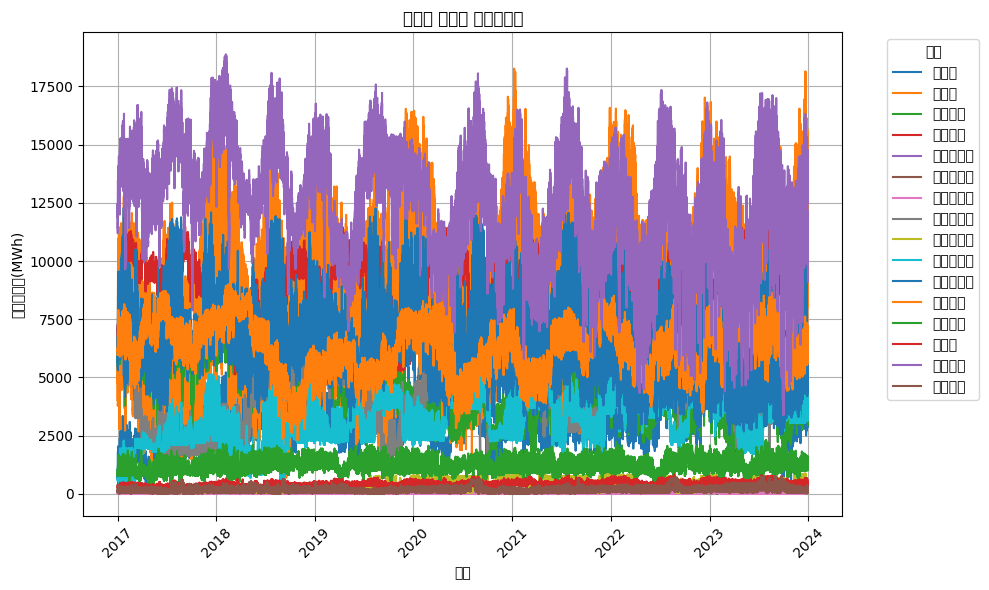

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


df['일시'] = pd.to_datetime(df['일시'])

df['전력거래량(MWh)'] = pd.to_numeric(df['전력거래량(MWh)'], errors='coerce')

df = df.dropna(subset=['전력거래량(MWh)', '지역'])

grouped = df.groupby('지역')

plt.figure(figsize=(10, 6))
for 지역, group in grouped:
    plt.plot(group['일시'], group['전력거래량(MWh)'], label=지역)

plt.xlabel('일시')
plt.ylabel('전력거래량(MWh)')
plt.title('지역별 일시별 전력거래량')
plt.legend(title='지역', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/환경프로젝트/분석을 위한 데이터 전처리(전력량을 범주형으로)/all_data(범주형_시간추가).csv')
data.head()

,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),...,20cm 지중온도(°C),30cm 지중온도(°C),지역,전력거래량(MWh),전력거래량_범주,년도,월,일,요일,시간
0,2017-01-01 10:00:00,-1.08,NaN,0.56,60.0,91.0,5.20,-2.34,1023.82,1031.46,...,NaN,NaN,경기도,3845.0,낮음,2017,1,1,6,10
1,2017-01-01 11:00:00,0.74,NaN,0.84,156.0,84.6,5.46,-1.58,1023.52,1031.14,...,NaN,NaN,경기도,3793.0,낮음,2017,1,1,6,11
2,2017-01-01 12:00:00,2.76,NaN,0.94,202.0,77.0,5.76,-0.90,1022.42,1029.96,...,NaN,NaN,경기도,3804.0,낮음,2017,1,1,6,12
3,2017-01-01 13:00:00,4.42,NaN,1.04,218.0,71.2,5.98,-0.34,1021.50,1028.96,...,NaN,NaN,경기도,3780.0,낮음,2017,1,1,6,13
4,2017-01-01 14:00:00,5.52,NaN,1.02,210.0,68.4,6.18,0.10,1020.66,1028.10,...,NaN,NaN,경기도,3788.0,낮음,2017,1,1,6,14


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978816 entries, 0 to 978815
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   일시             978816 non-null  object 
 1   기온(°C)         978801 non-null  float64
 2   강수량(mm)        154363 non-null  float64
 3   풍속(m/s)        978594 non-null  float64
 4   풍향(16방위)       978594 non-null  float64
 5   습도(%)          978796 non-null  float64
 6   증기압(hPa)       978800 non-null  float64
 7   이슬점온도(°C)      978799 non-null  float64
 8   현지기압(hPa)      978758 non-null  float64
 9   해면기압(hPa)      978761 non-null  float64
 10  일조(hr)         537418 non-null  float64
 11  일사(MJ/m2)      507694 non-null  float64
 12  적설(cm)         46039 non-null   float64
 13  3시간신적설(cm)     4564 non-null    float64
 14  전운량(10분위)      931584 non-null  float64
 15  중하층운량(10분위)    977026 non-null  float64
 16  최저운고(100m )    640279 non-null  float64
 17  시정(10m)        978788 non-nul

In [ ]:
data = data.drop(columns=['강수량(mm)', '일조(hr)','일사(MJ/m2)','적설(cm)','3시간신적설(cm)'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978816 entries, 0 to 978815
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   일시             978816 non-null  object 
 1   기온(°C)         978801 non-null  float64
 2   풍속(m/s)        978594 non-null  float64
 3   풍향(16방위)       978594 non-null  float64
 4   습도(%)          978796 non-null  float64
 5   증기압(hPa)       978800 non-null  float64
 6   이슬점온도(°C)      978799 non-null  float64
 7   현지기압(hPa)      978758 non-null  float64
 8   해면기압(hPa)      978761 non-null  float64
 9   전운량(10분위)      931584 non-null  float64
 10  중하층운량(10분위)    977026 non-null  float64
 11  최저운고(100m )    640279 non-null  float64
 12  시정(10m)        978788 non-null  float64
 13  지면온도(°C)       978730 non-null  float64
 14  5cm 지중온도(°C)   672509 non-null  float64
 15  10cm 지중온도(°C)  672527 non-null  float64
 16  20cm 지중온도(°C)  672519 non-null  float64
 17  30cm 지중온도(°C)  672489 non-nul

In [ ]:
data_1 = data.fillna(0)

data_1.head()
data_1.to_csv(f'/content/drive/MyDrive/환경프로젝트/분석을 위한 데이터 전처리(전력량을 범주형으로)/all_data(범주형_시간추가_결측치0).csv', index=False, encoding='utf-8-sig')

In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978816 entries, 0 to 978815
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   일시             978816 non-null  object 
 1   기온(°C)         978816 non-null  float64
 2   풍속(m/s)        978816 non-null  float64
 3   풍향(16방위)       978816 non-null  float64
 4   습도(%)          978816 non-null  float64
 5   증기압(hPa)       978816 non-null  float64
 6   이슬점온도(°C)      978816 non-null  float64
 7   현지기압(hPa)      978816 non-null  float64
 8   해면기압(hPa)      978816 non-null  float64
 9   전운량(10분위)      978816 non-null  float64
 10  중하층운량(10분위)    978816 non-null  float64
 11  최저운고(100m )    978816 non-null  float64
 12  시정(10m)        978816 non-null  float64
 13  지면온도(°C)       978816 non-null  float64
 14  5cm 지중온도(°C)   978816 non-null  float64
 15  10cm 지중온도(°C)  978816 non-null  float64
 16  20cm 지중온도(°C)  978816 non-null  float64
 17  30cm 지중온도(°C)  978816 non-nul

In [ ]:
df_cleaned = data.dropna()

print(df_cleaned.head())
df_cleaned.to_csv(f'/content/drive/MyDrive/환경프로젝트/분석을 위한 데이터 전처리(전력량을 범주형으로)/all_data(범주형_시간추가_결측치제거).csv', index=False, encoding='utf-8-sig')

                        일시  기온(°C)  풍속(m/s)  풍향(16방위)  습도(%)  증기압(hPa)  \
23167  2019-08-26 17:00:00   29.34     1.22      96.0   53.8     21.62   
23188  2019-08-27 14:00:00   26.88     1.74     134.0   66.2     23.38   
52885  2023-01-19 22:00:00    1.74     2.08     162.0   77.4      5.34   
52886  2023-01-19 23:00:00    1.36     1.72     110.0   79.8      5.34   
52896  2023-01-20 10:00:00   -3.18     4.24     298.0   45.6      2.20   

       이슬점온도(°C)  현지기압(hPa)  해면기압(hPa)  전운량(10분위)  ...  20cm 지중온도(°C)  \
23167      18.60    1003.30    1010.34        5.8  ...           27.1   
23188      19.96     999.52    1006.58        8.4  ...           26.0   
52885      -1.98    1013.56    1021.46        7.4  ...            0.9   
52886      -1.92    1013.00    1020.92        6.0  ...            0.9   
52896     -13.46    1021.18    1029.28        1.2  ...            0.8   

       30cm 지중온도(°C)   지역  전력거래량(MWh)  전력거래량_범주    년도  월   일 요일  시간  
23167           25.8  경기도     11525.0        높

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 446804 entries, 23167 to 978806
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   일시             446804 non-null  object 
 1   기온(°C)         446804 non-null  float64
 2   풍속(m/s)        446804 non-null  float64
 3   풍향(16방위)       446804 non-null  float64
 4   습도(%)          446804 non-null  float64
 5   증기압(hPa)       446804 non-null  float64
 6   이슬점온도(°C)      446804 non-null  float64
 7   현지기압(hPa)      446804 non-null  float64
 8   해면기압(hPa)      446804 non-null  float64
 9   전운량(10분위)      446804 non-null  float64
 10  중하층운량(10분위)    446804 non-null  float64
 11  최저운고(100m )    446804 non-null  float64
 12  시정(10m)        446804 non-null  float64
 13  지면온도(°C)       446804 non-null  float64
 14  5cm 지중온도(°C)   446804 non-null  float64
 15  10cm 지중온도(°C)  446804 non-null  float64
 16  20cm 지중온도(°C)  446804 non-null  float64
 17  30cm 지중온도(°C)  446804 non-null

In [ ]:
data_2 = data.drop(columns=['최저운고(100m )', '5cm 지중온도(°C)','10cm 지중온도(°C)','20cm 지중온도(°C)','30cm 지중온도(°C)'])

data_2.head()

,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),...,시정(10m),지면온도(°C),지역,전력거래량(MWh),전력거래량_범주,년도,월,일,요일,시간
0,2017-01-01 10:00:00,-1.08,0.56,60.0,91.0,5.20,-2.34,1023.82,1031.46,9.0,...,283.4,-0.24,경기도,3845.0,낮음,2017,1,1,6,10
1,2017-01-01 11:00:00,0.74,0.84,156.0,84.6,5.46,-1.58,1023.52,1031.14,2.0,...,556.2,0.22,경기도,3793.0,낮음,2017,1,1,6,11
2,2017-01-01 12:00:00,2.76,0.94,202.0,77.0,5.76,-0.90,1022.42,1029.96,7.0,...,724.0,1.24,경기도,3804.0,낮음,2017,1,1,6,12
3,2017-01-01 13:00:00,4.42,1.04,218.0,71.2,5.98,-0.34,1021.50,1028.96,7.0,...,706.0,3.16,경기도,3780.0,낮음,2017,1,1,6,13
4,2017-01-01 14:00:00,5.52,1.02,210.0,68.4,6.18,0.10,1020.66,1028.10,8.0,...,720.8,3.36,경기도,3788.0,낮음,2017,1,1,6,14


In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978816 entries, 0 to 978815
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   일시           978816 non-null  object 
 1   기온(°C)       978801 non-null  float64
 2   풍속(m/s)      978594 non-null  float64
 3   풍향(16방위)     978594 non-null  float64
 4   습도(%)        978796 non-null  float64
 5   증기압(hPa)     978800 non-null  float64
 6   이슬점온도(°C)    978799 non-null  float64
 7   현지기압(hPa)    978758 non-null  float64
 8   해면기압(hPa)    978761 non-null  float64
 9   전운량(10분위)    931584 non-null  float64
 10  중하층운량(10분위)  977026 non-null  float64
 11  시정(10m)      978788 non-null  float64
 12  지면온도(°C)     978730 non-null  float64
 13  지역           978816 non-null  object 
 14  전력거래량(MWh)   974890 non-null  float64
 15  전력거래량_범주     973458 non-null  object 
 16  년도           978816 non-null  int64  
 17  월            978816 non-null  int64  
 18  일            978816 non-

In [ ]:
data_2.to_csv(f'/content/drive/MyDrive/환경프로젝트/분석을 위한 데이터 전처리(전력량을 범주형으로)/all_data(범주형_시간추가_결측치열모두제거).csv', index=False, encoding='utf-8-sig')